In [2]:
#change working dir
import os
os.chdir("/home/vera/vsc5/data/projects/AILS-MICCAI-UWF4DR-Challenge/")

In [5]:
# setup dataset
from ails_miccai_uwf4dr_challenge.dataset_strategy import CombinedDatasetStrategy, Task1Strategy, DatasetBuilder, CustomDataset, DatasetStrategy, OriginalDatasetStrategy

# setup dataset

dataset_strategy = OriginalDataset() #ORIGINAL
task_strategy = Task1Strategy() #TASK 1


# Build dataset
dataset_builder = DatasetBuilder(dataset_strategy, task_strategy, split_ratio=0.8)

NameError: name 'OriginalDataset' is not defined

In [25]:
from ails_miccai_uwf4dr_challenge.dataset import DatasetOriginationType, ChallengeTaskType, DatasetBuilder

dataset = DatasetBuilder(dataset=DatasetOriginationType.ORIGINAL, task=ChallengeTaskType.TASK1).get_unsplit_dataframe()


In [27]:
dataset[dataset["quality"]==1].shape

(229, 2)

In [4]:
import numpy as np
class_sample_count = np.array([(dataset["quality"] == q).sum() for q in np.unique(dataset["quality"])])
weight = 1. / class_sample_count
samples_weight = weight[dataset["quality"]]


In [5]:
samples_weight

array([0.00487805, 0.00487805, 0.00436681, 0.00436681, 0.00487805,
       0.00487805, 0.00436681, 0.00487805, 0.00487805, 0.00487805,
       0.00487805, 0.00487805, 0.00487805, 0.00487805, 0.00487805,
       0.00487805, 0.00436681, 0.00487805, 0.00487805, 0.00487805,
       0.00487805, 0.00487805, 0.00487805, 0.00487805, 0.00487805,
       0.00487805, 0.00487805, 0.00487805, 0.00487805, 0.00487805,
       0.00487805, 0.00487805, 0.00436681, 0.00487805, 0.00487805,
       0.00487805, 0.00487805, 0.00436681, 0.00487805, 0.00487805,
       0.00487805, 0.00487805, 0.00487805, 0.00487805, 0.00487805,
       0.00487805, 0.00487805, 0.00487805, 0.00487805, 0.00487805,
       0.00487805, 0.00487805, 0.00487805, 0.00436681, 0.00487805,
       0.00487805, 0.00487805, 0.00487805, 0.00487805, 0.00487805,
       0.00487805, 0.00436681, 0.00487805, 0.00487805, 0.00487805,
       0.00487805, 0.00487805, 0.00487805, 0.00436681, 0.00487805,
       0.00487805, 0.00487805, 0.00487805, 0.00487805, 0.00487

In [6]:
class_weights = 1 / dataset["quality"].value_counts(normalize=True).sort_index().values
sample_weights = class_weights[dataset["quality"].values]

In [7]:
sample_weights

<FloatingArray>
[2.1170731707317074, 2.1170731707317074, 1.8951965065502183,
 1.8951965065502183, 2.1170731707317074, 2.1170731707317074,
 1.8951965065502183, 2.1170731707317074, 2.1170731707317074,
 2.1170731707317074,
 ...
 1.8951965065502183, 1.8951965065502183, 1.8951965065502183,
 1.8951965065502183, 1.8951965065502183, 1.8951965065502183,
 1.8951965065502183, 1.8951965065502183, 1.8951965065502183,
 1.8951965065502183]
Length: 434, dtype: Float64

In [37]:
sampler = torch.utils.data.WeightedRandomSampler(samples_weight, len(samples_weight))

In [10]:
import torch
a = torch.tensor([1.45454])
len(a)

1

In [19]:
import cv2
#show image from image path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


img = cv2.imread(dataset["image"][1])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(800, 1016, 3)

In [7]:
#peform pca on dataset
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import glob
import cv2
# Standardizing the features
def load_and_flatten_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    r_img = cv2.resize(img, (800, 1016))
    if img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    return r_img.flatten()



flattened_images = []
labels = []
for img_path in dataset["image"]:
    flattened_images.append(load_and_flatten_image(img_path))
        

flattened_images = np.array(flattened_images)
labels = np.array(labels)
print(f"Shape of flattened images array: {flattened_images.shape}")

Shape of flattened images array: (636, 812800)


In [11]:
import umap
import matplotlib.pyplot as plt

# Perform UMAP
umap_model = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, random_state=42)
umap_transformed = umap_model.fit_transform(flattened_images)

print(f"Shape of UMAP transformed data: {umap_transformed.shape}")



/home/vera/miniconda3/envs/ails/lib/python3.12/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Shape of UMAP transformed data: (636, 2)


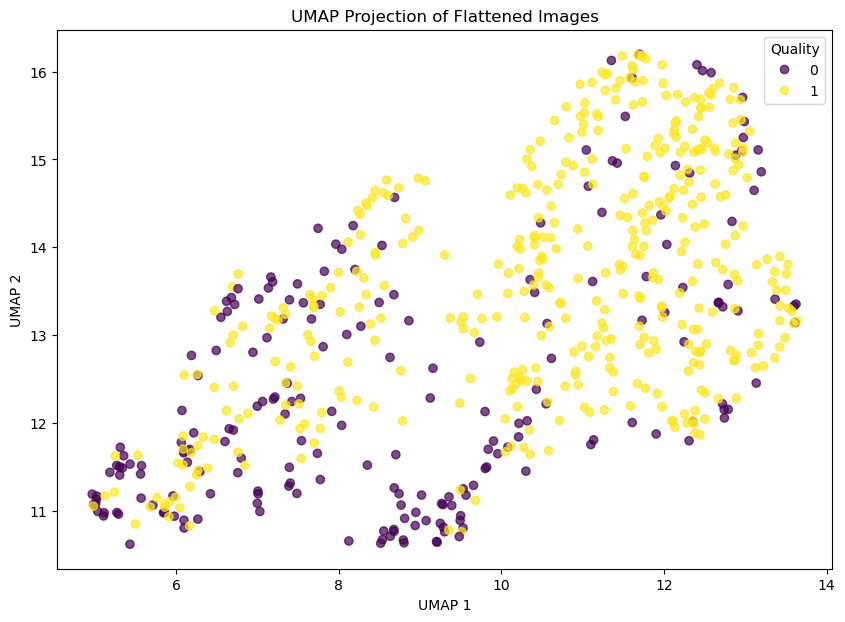

In [14]:
# Plot UMAP results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(umap_transformed[:, 0], umap_transformed[:, 1], c=dataset['quality'], alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Quality")
plt.title('UMAP Projection of Flattened Images')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


In [15]:
# Perform PCA
n_components = 2  # Number of principal components to keep
pca = PCA(n_components=n_components)
pca_transformed = pca.fit_transform(flattened_images)

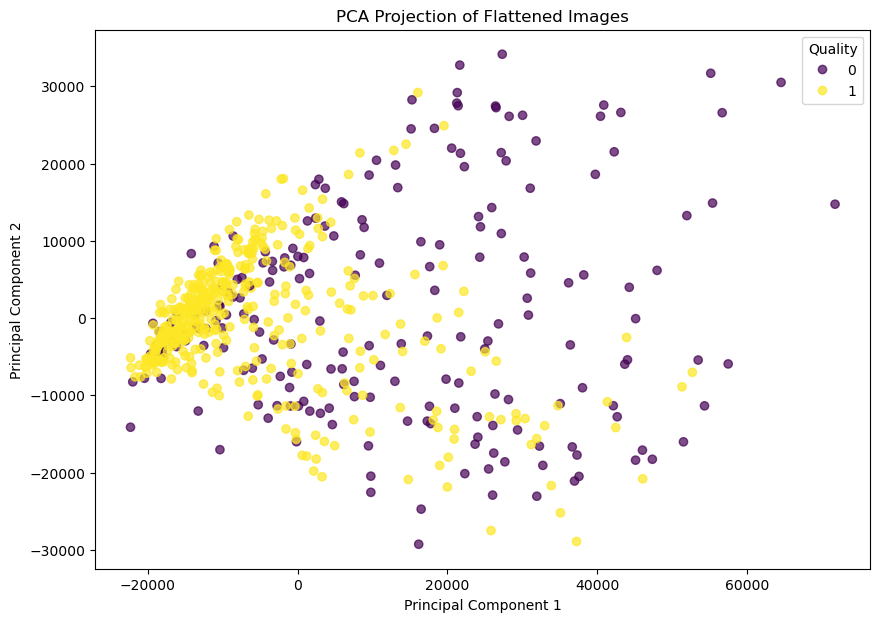

In [16]:
# Plot PCA results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=dataset['quality'], alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Quality")
plt.title('PCA Projection of Flattened Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_transformed = tsne.fit_transform(flattened_images)

# Plot TSNE results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=dataset['quality'], alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Quality")
plt.title('TSNE Projection of Flattened Images')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()
